# Tools

In [1]:
from matplotlib import pyplot as plt
import numpy as np, os, glob

In [2]:
%matplotlib inline

# Isotropic Model

In [3]:
from bem import matter, xscalc, xtaloriprobmodel as xopm

In [4]:
# create material
atoms = [matter.Atom('Ni', (0,0,0)), matter.Atom('Ni', (0.5, 0.5, 0)),
         matter.Atom('Ni', (0.5,0,0.5)), matter.Atom('Ni', (0, 0.5, 0.5))]
a=3.5238
alpha = 90.
lattice = matter.Lattice(a=a, b=a, c=a, alpha=alpha, beta=alpha, gamma=alpha)
fccNi = matter.Structure(atoms, lattice, sgid=225)

In [5]:
# calculate xs
import numpy as np
wavelengths = np.arange(0.05, 5.5, 0.001)
T = 300
calc = xscalc.XSCalculator(fccNi, T)
xs = [calc.xs(l) for l in wavelengths]

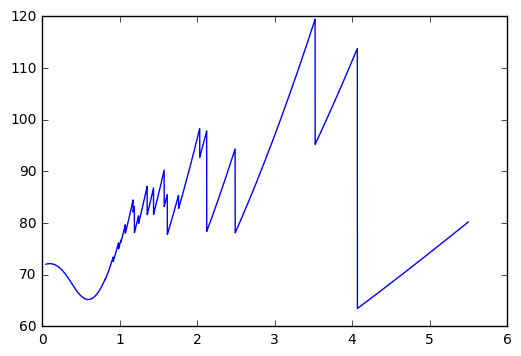

In [6]:
plt.plot(wavelengths, xs)

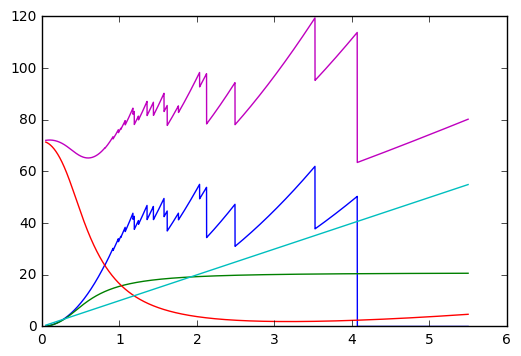

In [7]:
coh_el_xs = [calc.xs_coh_el(l) for l in wavelengths]
inc_el_xs = [calc.xs_inc_el(l) for l in wavelengths]
inel_xs = [calc.xs_inel(l) for l in wavelengths]
abs_xs = np.array([calc.xs_abs(l) for l in wavelengths])
plt.plot(wavelengths, coh_el_xs)
plt.plot(wavelengths, inc_el_xs)
plt.plot(wavelengths, inel_xs)
plt.plot(wavelengths, abs_xs)
plt.plot(wavelengths, abs_xs+coh_el_xs+inc_el_xs+inel_xs)

# With texture

In [8]:
texture_model = xopm.MarchDollase()
# by default, r for all hkl are 1.
# use the following form to change r
# make sure l>k>h
texture_model.r[(0,0,1)] = 2
# similarly beta can be changed
# texture_model.beta[(0,0,1)] = np.pi/2

calc = xscalc.XSCalculator(fccNi, T, texture_model)

In [11]:
xs = [calc.xs(l) for l in wavelengths]

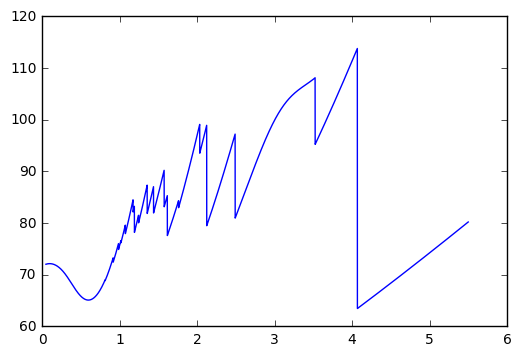

In [10]:
plt.plot(wavelengths, xs)